#SCC-ICMC-USP
## **MBA EM IA E BIGDATA**
#CURSO 2 - CD-AM-DM
#Exemplo - DADOS DESBALANCEADOS
Profa. Roseli A. F. Romero
...

OBJETIVO:
- Mostrar que em muitas aplicações práticas, os dados podem estar desbalanceados. 

In [1]:
import pandas as pd

In [2]:
# Os códigos a seguir realizam download dos dados e os descompactam para analise
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2022-10-01 12:04:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   565KB/s    in 0.8s    

2022-10-01 12:04:32 (565 KB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/.

In [3]:
dataset = pd.read_csv("bank-additional/bank-additional-full.csv",sep=";")
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Exploracao de dados

In [4]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

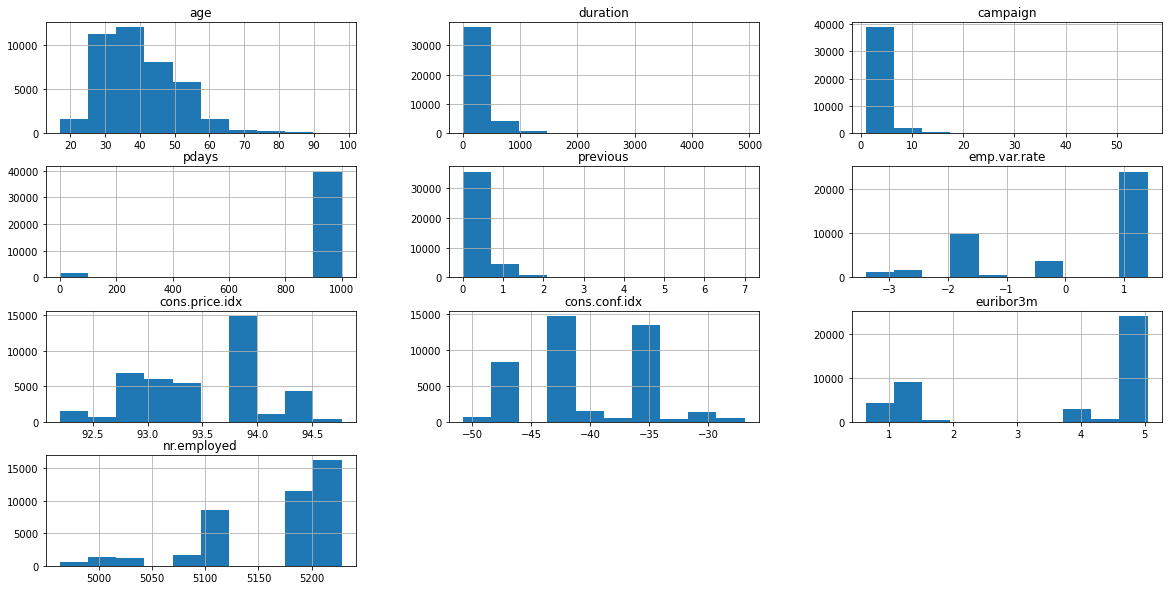

In [6]:
dataset.hist(figsize=(20,10))

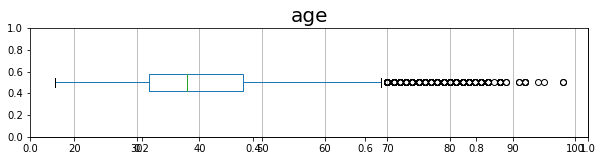

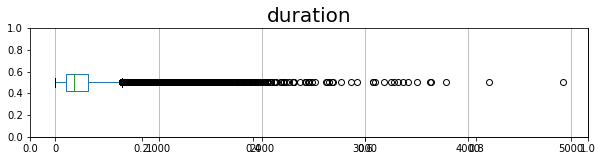

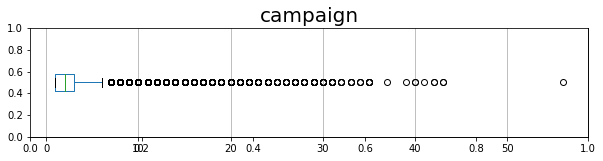

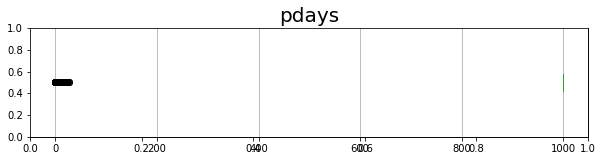

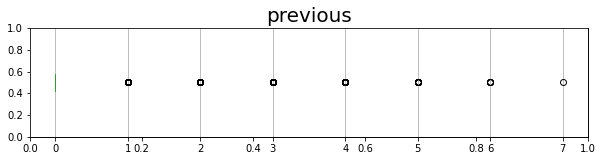

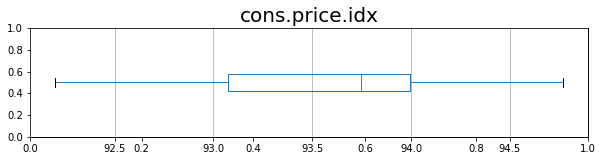

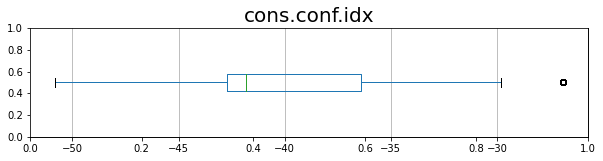

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for index, data in enumerate(["age","duration","campaign","pdays","previous","cons.price.idx","cons.conf.idx"]):
  plt.figure(index,figsize=(10,2))
  plt.title(data, fontsize=20)
  plt.axes().axes.get_yaxis().set_visible(False)
  dataset[[data,]].boxplot(vert=False)
  plt.draw()


In [8]:
for index, data in enumerate(["job","marital","education","default","housing","loan","contact","month","y","poutcome"]):
  print(data,":")
  print(dataset[data].unique())
  print("----------------------------")

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------
marital :
['married' 'single' 'divorced' 'unknown']
----------------------------
education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------
default :
['no' 'unknown' 'yes']
----------------------------
housing :
['no' 'yes' 'unknown']
----------------------------
loan :
['no' 'yes' 'unknown']
----------------------------
contact :
['telephone' 'cellular']
----------------------------
month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------
y :
['no' 'yes']
----------------------------
poutcome :
['nonexistent' 'failure' 'success']
----------------------------


In [9]:
dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000,-0.001,0.005,-0.034,0.024,-0.000,0.001,0.129,0.011,-0.018
duration,-0.001,1.000,-0.072,-0.048,0.021,-0.028,0.005,-0.008,-0.033,-0.045
campaign,0.005,-0.072,1.000,0.053,-0.079,0.151,0.128,-0.014,0.135,0.144
pdays,-0.034,-0.048,0.053,1.000,-0.588,0.271,0.079,-0.091,0.297,0.373
previous,0.024,0.021,-0.079,-0.588,1.000,-0.420,-0.203,-0.051,-0.454,-0.501
emp.var.rate,-0.000,-0.028,0.151,0.271,-0.420,1.000,0.775,0.196,0.972,0.907
cons.price.idx,0.001,0.005,0.128,0.079,-0.203,0.775,1.000,0.059,0.688,0.522
cons.conf.idx,0.129,-0.008,-0.014,-0.091,-0.051,0.196,0.059,1.000,0.278,0.101
euribor3m,0.011,-0.033,0.135,0.297,-0.454,0.972,0.688,0.278,1.000,0.945
nr.employed,-0.018,-0.045,0.144,0.373,-0.501,0.907,0.522,0.101,0.945,1.000


In [10]:
pd.value_counts(dataset["y"])

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:>

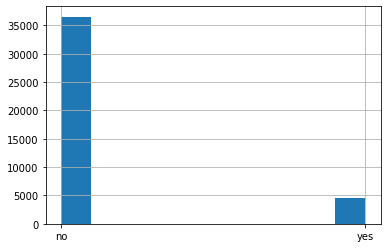

In [11]:
dataset["y"].hist()